## Arboles de decision

Ivan Guillermo Castro Rodriguez

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv('winequality-red.csv')
df2 = pd.read_csv('heart_cleveland_upload.csv')
df3 = pd.read_csv('car details v4.csv')

In [19]:
print(df1.head())       
print(df1.info())        
print(df1.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [21]:
print(df1.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


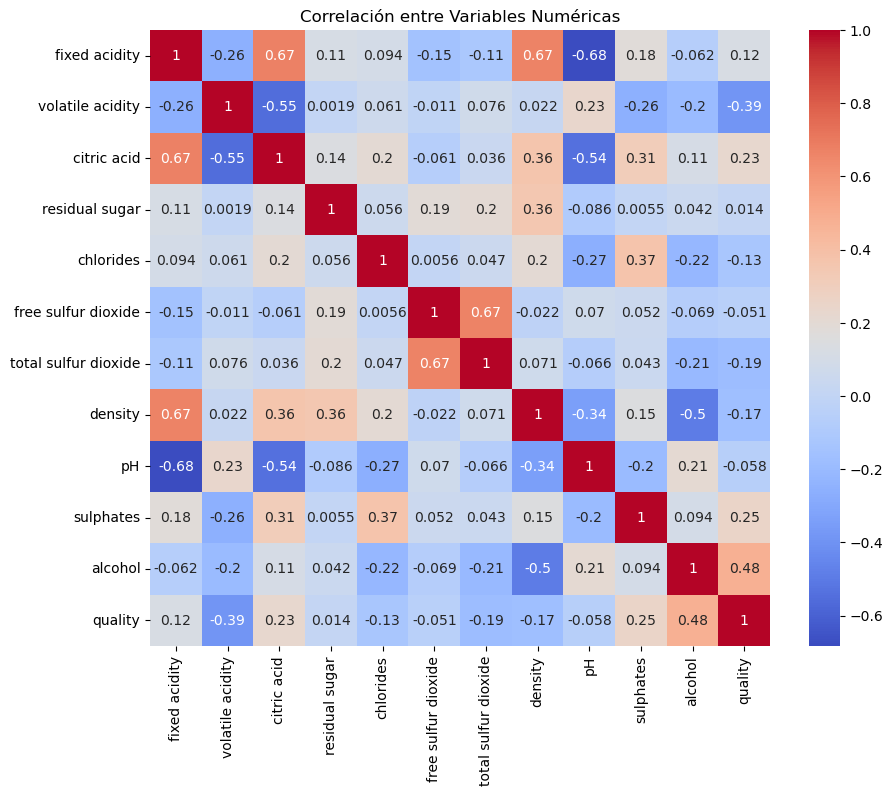

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()

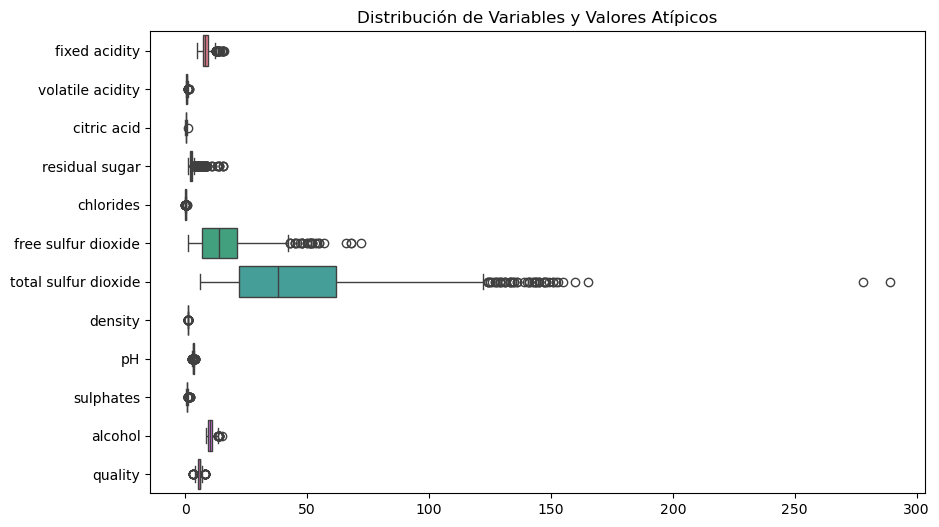

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, orient='h')
plt.title('Distribución de Variables y Valores Atípicos')
plt.show()

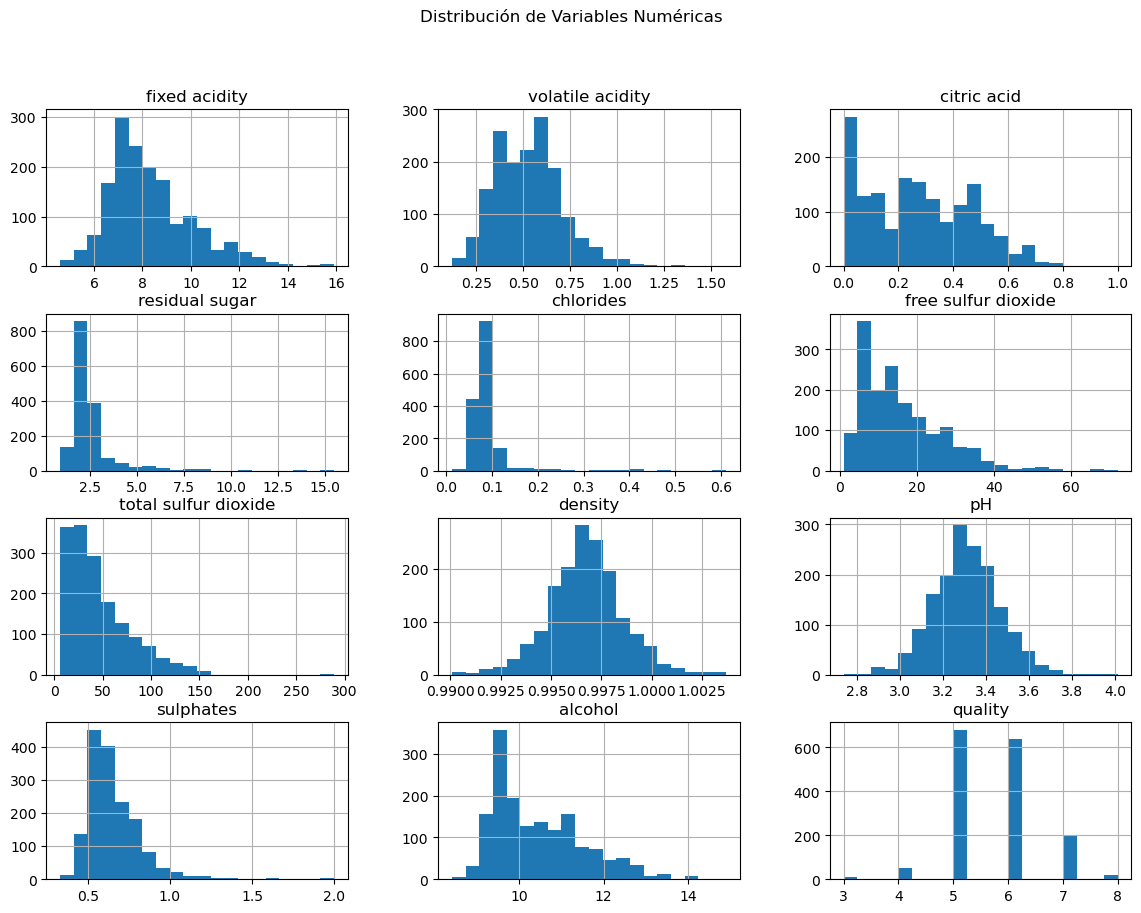

In [31]:

df1.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()



In [37]:
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height    

In [39]:
df1 = df1.dropna()  
df1 = df1.dropna(axis=1)

In [41]:
print(df1.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [43]:
df1 = df1.drop_duplicates()

In [45]:
df2 = df2.dropna()  
df2 = df2.dropna(axis=1)

In [47]:
df3 = df3.dropna()  
df3 = df3.dropna(axis=1)

In [49]:
df2 = df2.drop_duplicates()

In [63]:
df3 = df3.drop_duplicates()

In [67]:
X = df1.drop(columns=['quality']) 
y = df1['quality']

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

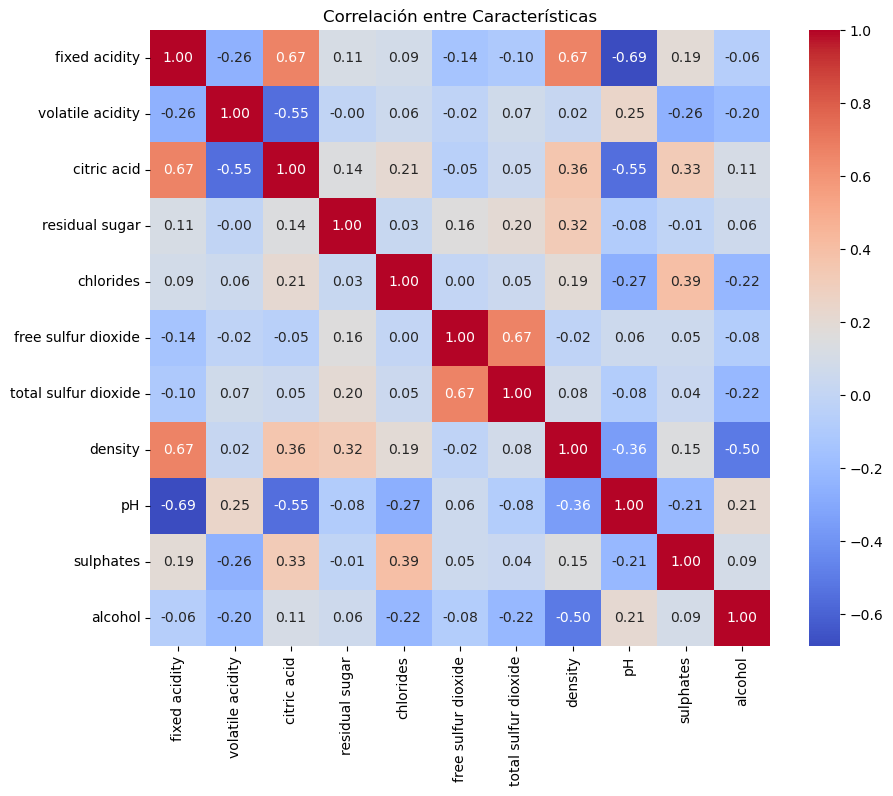

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Características')
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

In [81]:
X = df1.drop(columns=['quality'])  
y = df1['quality']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (1087, 11)
Tamaño de X_test: (272, 11)
Tamaño de y_train: (1087,)
Tamaño de y_test: (272,)


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [91]:
modelo_rf = RandomForestRegressor(random_state=42)
parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=parametros, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

In [95]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [96]:
print("Mejores hiperparámetros:", grid_search.best_params_)
mejor_modelo_rf = grid_search.best_estimator_

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
predicciones = mejor_modelo_rf.predict(X_test)

In [104]:
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio en el conjunto de prueba:", mse)

Error cuadrático medio en el conjunto de prueba: 0.37926596331619533


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [108]:
predicciones = mejor_modelo_rf.predict(X_test)

In [110]:
mae = mean_absolute_error(y_test, predicciones)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.46586125421880054


In [112]:
mse = mean_squared_error(y_test, predicciones)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.37926596331619533


In [116]:
r2 = r2_score(y_test, predicciones)
print("Coeficiente de Determinación (R²):", r2)

Coeficiente de Determinación (R²): 0.46458272692607105


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

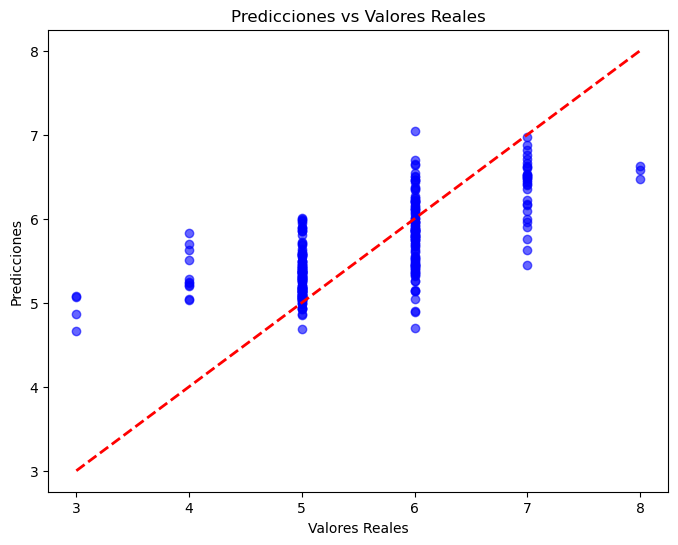

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, color='b', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

In [122]:
residuos = y_test - predicciones

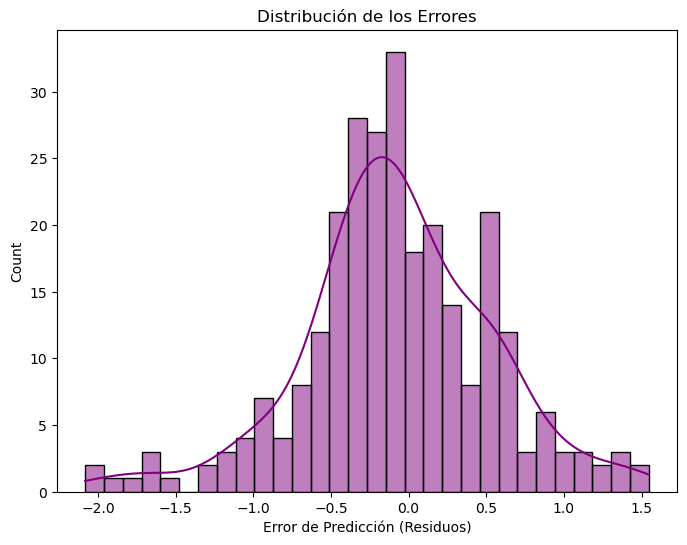

In [124]:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, color='purple', bins=30)
plt.xlabel("Error de Predicción (Residuos)")
plt.title("Distribución de los Errores")
plt.show()

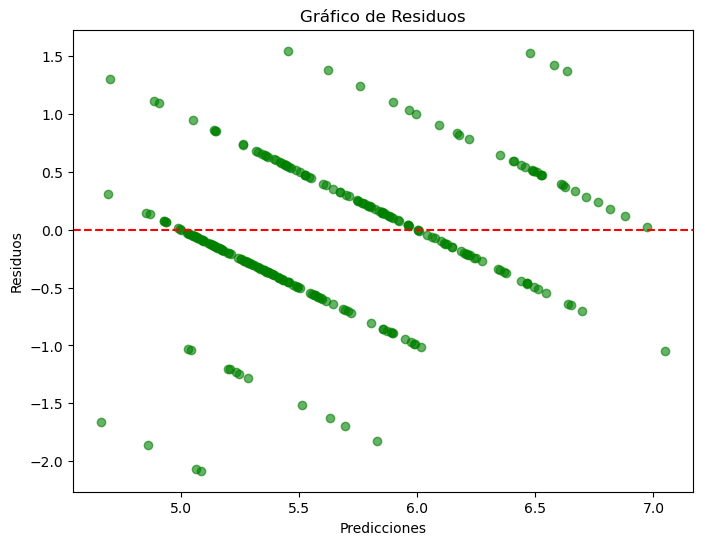

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(predicciones, residuos, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.show()

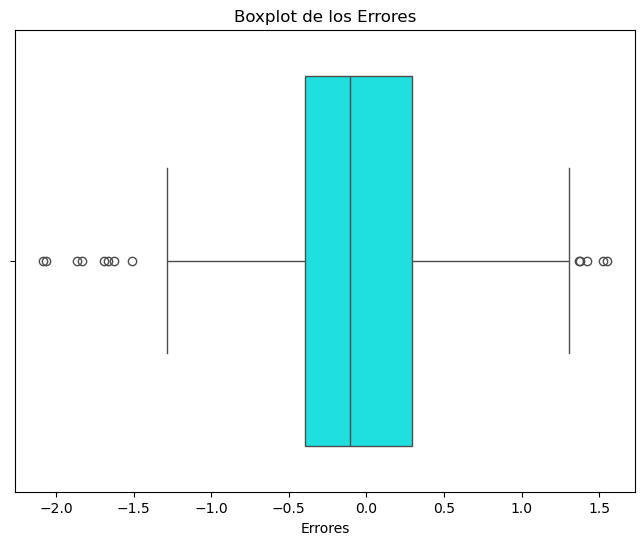

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuos, color='cyan')
plt.xlabel("Errores")
plt.title("Boxplot de los Errores")
plt.show()